# Exploratory Data Analysis - EDA
Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it.  

# Steps
1. Data Collection
2. Data Preparation and cleaning
3. Univariate and Bivarient Analysis
4. Data Visualization
5. Summarize the inference and write a conclusion

# Data Collection
1. Get your data

  a. goto [kaggle.com](https://www.kaggle.com/datasets)

  b. find a dataset.

  c. Download if for your use.

NOTE:  Here we have used  [US Accident Dataset](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)



# Download data from Kaggle to Colab
* Install Kaggle library
```
! pip install kaggle
```

* Kaggle API Key generation
  * Goto kaggle.com
  * login
  * profile
  * your profile
  * account
  * create new API token
  * save kaggle.json
  * upload kaggle.json to colab



In [1]:
! pip install kaggle

     ---------------------------------------- 63.3/63.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=dbcac1ef263455db5e77c9ad1e36504426302850daae44353c7368310dad6dae
  Stored in directory: c:\users\vwadhawan\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [2]:
#! mkdir kaggle

In [3]:
#! cp kaggle.json kaggle/

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#! kaggle datasets download sobhanmoosavi/us-accidents

Traceback (most recent call last):
  File "C:\Vipul\Anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Vipul\Anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Vipul\Anaconda\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Vipul\Anaconda\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Vipul\Anaconda\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\vwadhawan\.kaggle. Or use the environment method.


In [ ]:
#!unzip  /content/us-accidents.zip -d /content/ 

# Import Library

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [6]:
data_filename = 'data/US_Accidents_Dec21_updated.csv'

In [7]:
df = pd.read_csv(data_filename)

In [8]:
# Setting options to display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [9]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# Dataset Description and stats

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
df.shape

(2845342, 47)

In [25]:
df["Severity"].nunique()

4

In [28]:
df["Side"].nunique()

3

In [41]:
df["State"].nunique()

49

In [37]:
df["Country"].nunique()

1

In [38]:
df["Timezone"].nunique()

4

In [40]:
df["Airport_Code"].nunique()

2004

In [42]:
df["Weather_Condition"].nunique()

127

In [39]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
df["Timezone"].nunique()

# Missing Value Analysis

In [43]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [44]:
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [46]:
#data in percentage
missing_value=df.isna().sum().sort_values(ascending=False)/len(df)*100

In [47]:
missing_value

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [56]:
# All columns which have atleast 1 missing value
missing_value=missing_value[missing_value>0]

<AxesSubplot:>

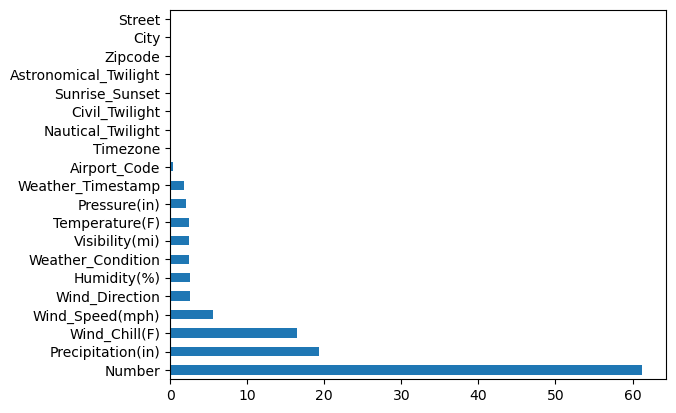

In [57]:
# This is simple way to plot. There are more ways with matplotlib or seaborn
missing_value.plot(kind='barh')

In [59]:
#remove the columns where there are significant empty values as its difficult to interpret
df.drop(['Number','Precipitation(in)','Wind_Chill(F)'],axis=1, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Humidity(%)            float64
 22  Pressure(in)      

In [62]:
df.nunique()

ID                       2845342
Severity                       4
Start_Time               1959333
End_Time                 2351505
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Weather_Condition            127
Amenity                        2
Bump                           2
Crossing                       2
Give_Way  

### columns to explore
- City
- Start time
- Visibility

In [92]:
# City
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [93]:
df.City.nunique()

11681

In [94]:
# Number of accidents per city
import seaborn as sns

In [95]:
accidents_city = df.City.value_counts().sort_values(ascending=False)

In [96]:
accidents_city=accidents_city[accidents_city>10000]

In [97]:
accidents_city.count()

34

In [98]:
accidents_city

Miami              106966
Los Angeles         68956
Orlando             54691
Dallas              41979
Houston             39448
Charlotte           33152
Sacramento          32559
San Diego           26627
Raleigh             22840
Minneapolis         22768
Portland            20944
Nashville           20267
Austin              18301
Baton Rouge         18182
Phoenix             17143
Saint Paul          16869
New Orleans         16251
Atlanta             15622
Jacksonville        14967
Richmond            14349
Tucson              13799
San Jose            13377
Riverside           13310
Kansas City         13298
Bakersfield         12044
San Bernardino      11249
Chicago             11188
Tampa               10984
Salt Lake City      10709
Ontario             10538
Anaheim             10502
Hialeah             10398
Fort Lauderdale     10345
Oakland             10051
Name: City, dtype: int64

In [152]:
accidents_state = df.State.value_counts().sort_values(ascending=False)
accidents_state=accidents_state[accidents_state>80000]
accidents_state.info

<bound method Series.info of CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64>

<AxesSubplot:>

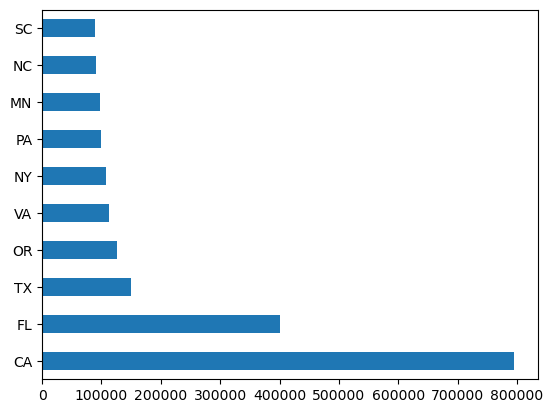

In [154]:
accidents_state.plot(kind='barh')

# Exploratory Analysis and Visualization

# Summary and Conlusion

1. Wind chill, percipitation has more than 10% missing values
